## Importando as bibliotecas

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

## Importando e limpando os dados

In [10]:
dataset = pd.read_csv('dados\movies.csv')

#### Buscando nas colunas os nulos e preenchendo com 0 

In [11]:

for col in dataset.columns:
  percentual_faltante = np.mean(dataset[col].isnull())
  print (f'{col} - {percentual_faltante} ')
  if percentual_faltante != 0:
    dataset[col] = dataset[col].fillna(0)
    print (f'{col} - mudada ')
  else:
    print (f'{col} - ok ')

name - 0.0 
name - ok 
rating - 0.010041731872717789 
rating - mudada 
genre - 0.0 
genre - ok 
year - 0.0 
year - ok 
released - 0.0002608242044861763 
released - mudada 
score - 0.0003912363067292645 
score - mudada 
votes - 0.0003912363067292645 
votes - mudada 
director - 0.0 
director - ok 
writer - 0.0003912363067292645 
writer - mudada 
star - 0.00013041210224308815 
star - mudada 
country - 0.0003912363067292645 
country - mudada 
budget - 0.2831246739697444 
budget - mudada 
gross - 0.02464788732394366 
gross - mudada 
company - 0.002217005738132499 
company - mudada 
runtime - 0.0005216484089723526 
runtime - mudada 


 ##### Confirmando o preenchimento de todas as colunas 

In [12]:
for col in dataset.columns:
  percentual_faltante = np.mean(dataset[col].isnull())
  print (f'{col} - {percentual_faltante} ')

name - 0.0 
rating - 0.0 
genre - 0.0 
year - 0.0 
released - 0.0 
score - 0.0 
votes - 0.0 
director - 0.0 
writer - 0.0 
star - 0.0 
country - 0.0 
budget - 0.0 
gross - 0.0 
company - 0.0 
runtime - 0.0 


#### Mudando os tipos das colunas 

In [13]:
dataset['budget'] = dataset['budget'].astype('int64')
dataset['gross'] = dataset['gross'].astype('int64')
dataset['runtime'] = dataset['runtime'].astype('int64')
dataset['votes'] = dataset['runtime'].astype('int64')



#### Problemas encontrados nos dados
*  Existem casos que a coluna Year e o ano do released estão diferentes



##### Existem casos em que o ano da Coluna 'Released' e 'Year' estão diferentes - necessário corrigir

In [14]:
# split na coluna de released para pegar o ano dali e comparar com a coluna year
ano = dataset["released"].str.split(" ", n = 3, expand = True)
dataset['ano'] = ano[2]
display(dataset)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,ano
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,146,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,104,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,124,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,88,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,98,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,90,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90,2020
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,90,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0,2020
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,120,James Randall,James Randall,Christina Roz,United States,15000,0,0,120,2020


- Depois do split, verifiquei que houveram casos onde não tem ano no released ou está zerado 

In [15]:
dataset['ano'].drop_duplicates()

0              1980
8              1981
11             1984
78          (United
79             1983
91             1982
201         States)
312            None
405            1987
416            1985
472            1986
823            1988
891            1990
922            1989
1181           1992
1325           2008
1477           1991
1571           1993
1586           1999
1852           2001
1915           2016
1941           1997
1978           1994
2173           1995
2194           1998
2219           2019
2365           1996
2551           2000
2974           2014
3802           2002
3849           2003
3938           2005
4053           2004
4419           2006
4596           2007
4970           2010
5106           2011
5114           2009
5482           2013
5640           2015
5728            NaN
5754           2012
5833    (Australia)
6767           2017
7040           2018
7462           2020
Name: ano, dtype: object

In [36]:
for ano in dataset['ano']:
    

1980
1980
1980
1980
1980
1980
1980
1980
1981
1980
1980
1984
1980
1980
1980
1980
1980
1980
1980
1980
1980
1981
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1981
1980
1980
1980
1980
1980
1980
1981
1980
1980
1980
1980
1980
1980
1980
1980
1981
1980
1980
1980
1980
1981
1980
1980
1980
1980
1981
1980
1980
1981
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
(United
1983
1980
1980
1980
1980
1980
1980
1981
1980
1980
1980
1980
1982
1981
1981
1981
1981
1983
1982
1981
1981
1981
1982
1982
1981
1983
1981
1981
1981
1981
1981
1981
1981
1981
1981
1981
1981
1982
1981
1982
1981
1981
1981
1981
1981
1981
1981
1981
1981
1981
1982
1982
1981
1981
1981
1981
1981
1981
1981
1981
1981
1981
1981
1983
1981
1981
1981
1982
1981
1981
1981
1981
1981
1981
1981
1981
1981
1981
1981
1981
1981
1981
1981
1982
1982
1981
1981
1981
1981
1981
1981
1981
1981
1981
1981
1982
1981
1981
1981
1981
1981
1982
1981
1981
1981
1981
1981
1981
1981
1981
1982
1982
1981
1981
1981
1981
1981
1981
1981
1981
19

In [ ]:
for ano in dataset['ano']:
    ano > 4 

In [16]:
dataset.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,ano
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,162,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,181,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,194,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,138,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,149,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,92,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,85,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,89,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89,1989
1601,My Twentieth Century,0,Comedy,1989,"January 13, 1990 (Japan)",7.1,104,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104,1990


Excluindo filmes repetidos

### Correlação número 1:
Os filmes com os maiores budgets são os que tem o maior gross

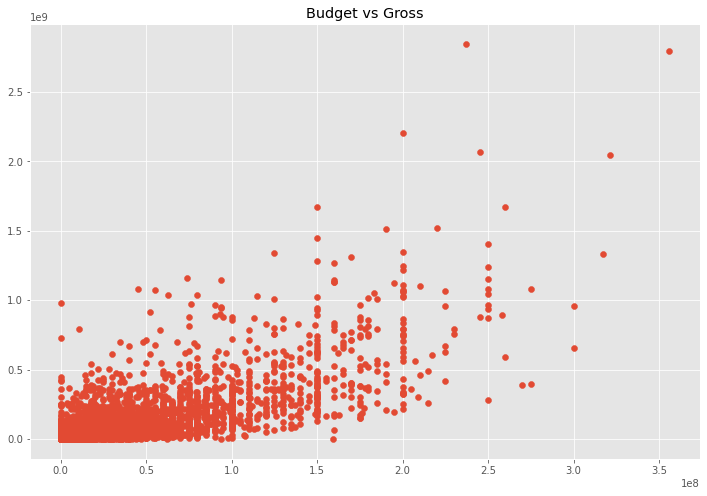

In [17]:
# scatter plot with budget e gross

plt.scatter(x=dataset['budget'], y=dataset['gross'])
plt.title('Budget vs Gross')

plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

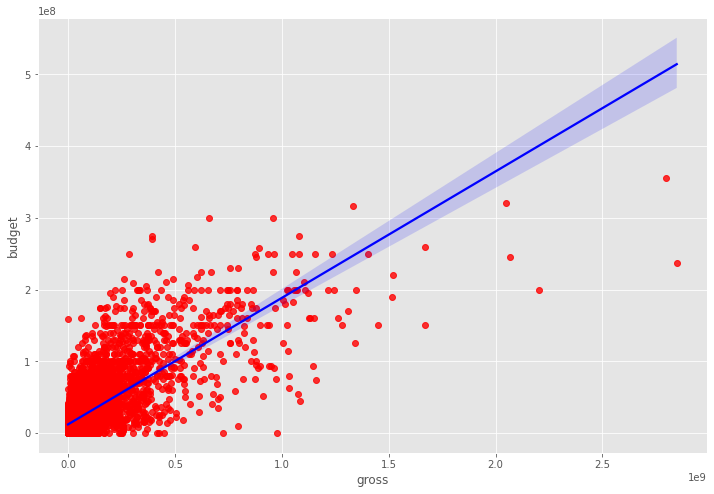

In [18]:
sns.regplot(x="gross", y="budget", data=dataset, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [19]:
dataset.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.116358,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.394564,0.056863,0.186012,0.394564
votes,0.116358,0.394564,1.000000,0.268372,0.244339,1.000000
budget,0.309212,0.056863,0.268372,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.244339,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,1.000000,0.268372,0.244339,1.000000


In [20]:
# muita correlação entre budget e gross realmente 

In [21]:
# Matriz de correlação

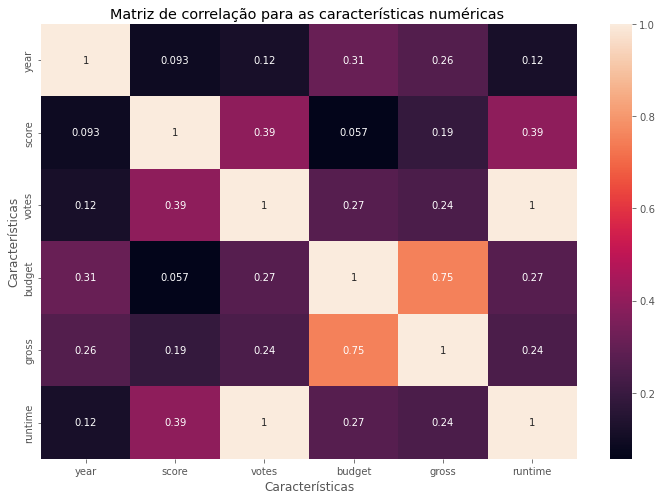

In [22]:
matriz_correlacao = dataset.corr(method='pearson')

sns.heatmap(matriz_correlacao, annot=True)
plt.title('Matriz de correlação para as características numéricas ')
plt.xlabel("Características")
plt.ylabel("Características")
plt.show()

In [23]:
# olhando para as empresas
# transformando em numeros com o dicionário 
dataset

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,ano
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,146,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,104,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,124,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,88,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,98,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,90,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90,2020
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,90,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0,2020
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,120,James Randall,James Randall,Christina Roz,United States,15000,0,0,120,2020


In [24]:
ds_numeracao =  dataset.copy()


for col_name in ds_numeracao.columns:
  if (ds_numeracao[col_name].dtype == 'object'):
    ds_numeracao[col_name] = ds_numeracao[col_name].astype('category')
    ds_numeracao[col_name] = ds_numeracao[col_name].cat.codes


ds_numeracao


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,ano
0,6587,7,6,1980,1706,8.4,146,2589,4015,1048,55,19000000,46998772,2320,146,2
1,5573,7,1,1980,1493,5.8,104,2269,1633,328,56,4500000,58853106,732,104,2
2,5142,5,0,1980,1772,8.7,124,1111,2568,1746,56,18000000,538375067,1541,124,2
3,286,5,4,1980,1493,7.7,88,1301,2001,2247,56,3500000,83453539,1813,88,2
4,1027,7,4,1980,1544,7.3,98,1054,522,411,56,6000000,39846344,1778,98,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,0,6,2020,2965,3.1,90,1500,2290,2422,56,7000,0,0,90,42
7664,1678,0,4,2020,1108,4.7,90,774,2615,1887,56,0,0,540,90,42
7665,4717,0,6,2020,194,5.7,0,2061,2684,2041,56,58750,0,942,0,42
7666,2843,0,6,2020,2818,0.0,120,1184,1825,451,56,15000,0,0,120,42


In [25]:
dataset

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,ano
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,146,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,104,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,124,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,88,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,98,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,90,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90,2020
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,90,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0,2020
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,120,James Randall,James Randall,Christina Roz,United States,15000,0,0,120,2020


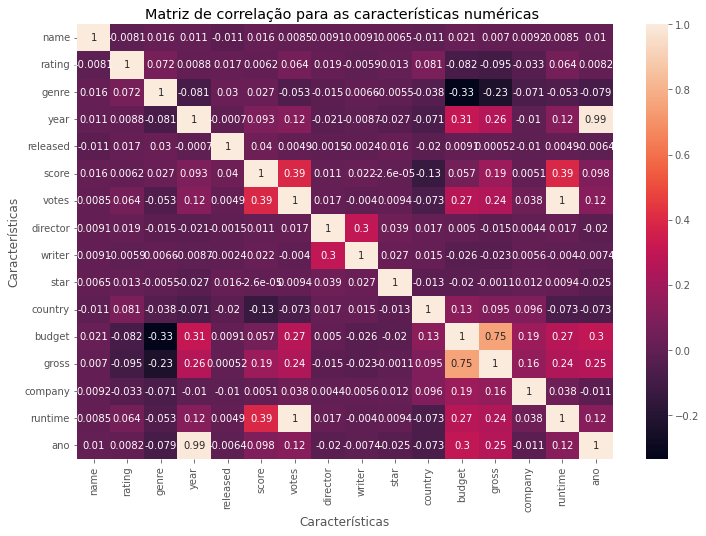

In [26]:
matriz_correlacao = ds_numeracao.corr(method='pearson')

sns.heatmap(matriz_correlacao, annot=True)
plt.title('Matriz de correlação para as características numéricas ')
plt.xlabel("Características")
plt.ylabel("Características")
plt.show()

In [27]:
correlacao_todos = ds_numeracao.corr()

In [28]:
pares_correlacionados =  correlacao_todos.unstack()
pares_correlacionados.sort_values()

budget    genre      -0.334021
genre     budget     -0.334021
          gross      -0.234297
gross     genre      -0.234297
country   score      -0.133346
                        ...   
budget    budget      1.000000
gross     gross       1.000000
company   company     1.000000
director  director    1.000000
ano       ano         1.000000
Length: 256, dtype: float64

In [29]:
alta_correlacao = pares_correlacionados.sort_values() > 0.5

In [30]:
alta_correlacao

budget    genre       False
genre     budget      False
          gross       False
gross     genre       False
country   score       False
                      ...  
budget    budget       True
gross     gross        True
company   company      True
director  director     True
ano       ano          True
Length: 256, dtype: bool

In [31]:
# a empresa que faz o filme não tem relação com o lucro 